In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Reading the dataset
df = pd.read_csv('../../data/raw/mouvements_stock_fictifs.csv')

# Displaying the first few rows of the dataset
df.head()

,date,product_name,quantity,type_movement
0,2020-08-10,Lait,550,import
1,2020-08-23,Banane,429,import
2,2020-09-10,Tomate,522,import
3,2020-09-13,Carotte,349,import
4,2020-09-13,Banane,428,import


In [14]:
# Convert 'date' to datetime and extract features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df[['day', 'month', 'year']] = df[['day', 'month', 'year']].astype(int)
df = df[['day', 'month', 'year', 'product_name', 'type_movement', 'quantity']]
df.head()

,day,month,year,product_name,type_movement,quantity
0,10,8,2020,Lait,import,550
1,23,8,2020,Banane,import,429
2,10,9,2020,Tomate,import,522
3,13,9,2020,Carotte,import,349
4,13,9,2020,Banane,import,428


In [15]:
# Define features (X) and target (y)
X = df[['day', 'month', 'year', 'product_name', 'type_movement']]
y = df['quantity']

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['product_name', 'type_movement'])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.linear_model import LinearRegression

# Train the multiple linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict and store results in a DataFrame
y_pred = reg.predict(X_test)
df_pred = pd.DataFrame({'Real Values' : y_test,'Predicted Values': y_pred})

RMSE: 152.2875222853097
MAE: 131.98956893460374
MAPE: 3147715907256050.5
R2 Score: 0.8772247567928078


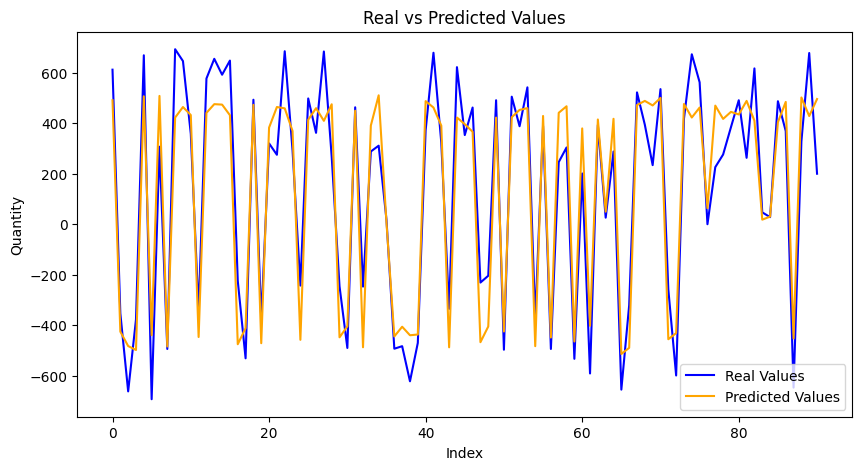

In [31]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Calculate and print the performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

# R2 score
print(f"R2 Score: {r2}")

# Visualisation en courbe de y_pred et y_test
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Real Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='orange')
plt.title('Real vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.show()